En este archivo puedes escribir lo que estimes conveniente. Te recomendamos detallar tu solución y todas las suposiciones que estás considerando. Aquí puedes ejecutar las funciones que definiste en los otros archivos de la carpeta src, medir el tiempo, memoria, etc.

In [12]:
file_path = "farmers-protest-tweets-2021-2-4.json"

In [42]:
import pandas as pd
import seaborn as sns
import time
from memory_profiler import memory_usage
from q1_memory import q1_memory
from q1_time import q1_time

In [14]:
dataframe = pd.read_json(file_path, lines=True)

## Inspección del Dataframe

In [15]:
dataframe.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,The world progresses while the Indian police a...,1364506249291784198,"{'username': 'ArjunSinghPanam', 'displayname':...",[https://twitter.com/ravisinghka/status/136415...,[https://t.co/es3kn0IQAF],0,0,...,0,1364506249291784198,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,"{'username': 'PrdeepNain', 'displayname': 'Pra...",[],[],0,0,...,0,1364506237451313155,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'..."
2,https://twitter.com/parmarmaninder/status/1364...,2021-02-24 09:23:22+00:00,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,1364506195453767680,"{'username': 'parmarmaninder', 'displayname': ...",[],[],0,0,...,0,1364506195453767680,pa,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,None
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,0,1364350947099484160,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S..."
4,https://twitter.com/KotiaPreet/status/13645061...,2021-02-24 09:23:10+00:00,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,1364506144002088963,"{'username': 'KotiaPreet', 'displayname': 'Pre...",[],[],0,0,...,0,1364506144002088963,und,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None


In [16]:
dataframe.tail()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
117402,https://twitter.com/rickyrickstir/status/13600...,2021-02-12 01:37:02+00:00,#FarmersProtest #KisanAndolan #KisaanMajdoorEk...,#FarmersProtest #KisanAndolan #KisaanMajdoorEk...,1360040182771163138,"{'username': 'rickyrickstir', 'displayname': '...",[],[],0,0,...,0,1360040182771163138,und,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,None,None
117403,https://twitter.com/PunjabTak/status/136004014...,2021-02-12 01:36:53+00:00,PM मोदी की अपील के बीच संयुक्त किसान मोर्चा का...,PM मोदी की अपील के बीच संयुक्त किसान मोर्चा का...,1360040146402373637,"{'username': 'PunjabTak', 'displayname': 'Punj...",[https://youtu.be/aG3qHGwoYag],[https://t.co/AzZNOGI8BX],0,0,...,0,1360040146402373637,hi,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
117404,https://twitter.com/ish_kayy/status/1360040134...,2021-02-12 01:36:50+00:00,United we stand.\nDivided we fall\n#Mahapancha...,United we stand.\nDivided we fall\n#Mahapancha...,1360040134230556678,"{'username': 'ish_kayy', 'displayname': 'ishy'...",[],[],0,65,...,6,1360040134230556678,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
117405,https://twitter.com/TV9Bharatvarsh/status/1360...,2021-02-12 01:36:49+00:00,"सिंघु बॉर्डर पर लंबी लड़ाई की तैयारी, किसानों ...","सिंघु बॉर्डर पर लंबी लड़ाई की तैयारी, किसानों ...",1360040127679000577,"{'username': 'TV9Bharatvarsh', 'displayname': ...",[https://www.tv9hindi.com/india/farmers-protes...,[https://t.co/bkjh7WXc0w],0,1,...,1,1360040127679000577,hi,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,None,NaN,None,None
117406,https://twitter.com/SikhVibes/status/136004012...,2021-02-12 01:36:49+00:00,"@Kisanektamorcha We are with you, keep the mor...","@Kisanektamorcha We are with you, keep the mor...",1360040127146430470,"{'username': 'SikhVibes', 'displayname': 'Sikh...",[],[],2,19,...,2,1360038291471388672,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'..."


In [17]:
dataframe.shape

(117407, 21)

In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117407 entries, 0 to 117406
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   url              117407 non-null  object             
 1   date             117407 non-null  datetime64[ns, UTC]
 2   content          117407 non-null  object             
 3   renderedContent  117407 non-null  object             
 4   id               117407 non-null  int64              
 5   user             117407 non-null  object             
 6   outlinks         117407 non-null  object             
 7   tcooutlinks      117407 non-null  object             
 8   replyCount       117407 non-null  int64              
 9   retweetCount     117407 non-null  int64              
 10  likeCount        117407 non-null  int64              
 11  quoteCount       117407 non-null  int64              
 12  conversationId   117407 non-null  int64              
 13 

In [19]:
dataframe.describe()

,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet
count,1.174070e+05,117407.000000,117407.000000,117407.000000,117407.000000,1.174070e+05,0.0
mean,1.362062e+18,0.631410,5.045619,14.609674,0.336241,1.361764e+18,NaN
std,1.293803e+15,9.436159,58.237370,229.083983,4.474576,1.294352e+16,NaN
min,1.360040e+18,0.000000,0.000000,0.000000,0.000000,1.981606e+10,NaN
25%,1.360935e+18,0.000000,0.000000,0.000000,0.000000,1.360887e+18,NaN
50%,1.361945e+18,0.000000,0.000000,1.000000,0.000000,1.361914e+18,NaN
75%,1.363097e+18,0.000000,1.000000,2.000000,0.000000,1.363068e+18,NaN
max,1.364506e+18,1291.000000,7723.000000,27888.000000,756.000000,1.364506e+18,NaN


## Análisis de las Columnas

In [20]:
dataframe.dtypes

url                             object
date               datetime64[ns, UTC]
content                         object
renderedContent                 object
id                               int64
user                            object
outlinks                        object
tcooutlinks                     object
replyCount                       int64
retweetCount                     int64
likeCount                        int64
quoteCount                       int64
conversationId                   int64
lang                            object
source                          object
sourceUrl                       object
sourceLabel                     object
media                           object
retweetedTweet                 float64
quotedTweet                     object
mentionedUsers                  object
dtype: object

In [21]:
for column in dataframe:
    try:
        print(column, dataframe[column].nunique())
    except:
        print(column, dataframe[column].astype(str).nunique())

url 117407
date 109652
content 112453
renderedContent 106652
id 117407
user 29579
outlinks 28731
tcooutlinks 49456
replyCount 165
retweetCount 514
likeCount 902
quoteCount 109
conversationId 105213
lang 46
source 82
sourceUrl 80
sourceLabel 81
media 26599
retweetedTweet 0
quotedTweet 22355
mentionedUsers 17981


In [22]:
dataframe["url"]

0         https://twitter.com/ArjunSinghPanam/status/136...
1         https://twitter.com/PrdeepNain/status/13645062...
2         https://twitter.com/parmarmaninder/status/1364...
3         https://twitter.com/anmoldhaliwal/status/13645...
4         https://twitter.com/KotiaPreet/status/13645061...
                                ...                        
117402    https://twitter.com/rickyrickstir/status/13600...
117403    https://twitter.com/PunjabTak/status/136004014...
117404    https://twitter.com/ish_kayy/status/1360040134...
117405    https://twitter.com/TV9Bharatvarsh/status/1360...
117406    https://twitter.com/SikhVibes/status/136004012...
Name: url, Length: 117407, dtype: object

In [23]:
dataframe["lang"].value_counts()

lang
en     48429
und    35372
hi     17880
pa     10028
in      1823
tl       527
et       524
ta       451
kn       265
ht       222
mr       187
es       176
ur       131
gu       126
ml       110
te       103
fr        92
tr        86
bn        73
it        73
pt        69
da        64
hu        60
de        58
fi        54
ne        50
nl        44
sl        39
ca        35
ro        32
sv        31
lv        30
eu        30
cy        25
no        22
cs        21
or        18
lt        14
pl        11
is         7
vi         5
ja         4
ru         3
ar         1
fa         1
si         1
Name: count, dtype: int64

In [24]:
dataframe["retweetedTweet"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
117402   NaN
117403   NaN
117404   NaN
117405   NaN
117406   NaN
Name: retweetedTweet, Length: 117407, dtype: float64

## Análisis de Valores Nulos

In [25]:
dataframe.isnull().sum()

url                     0
date                    0
content                 0
renderedContent         0
id                      0
user                    0
outlinks                0
tcooutlinks             0
replyCount              0
retweetCount            0
likeCount               0
quoteCount              0
conversationId          0
lang                    0
source                  0
sourceUrl             912
sourceLabel           912
media               89298
retweetedTweet     117407
quotedTweet         75971
mentionedUsers      79373
dtype: int64

<Axes: >

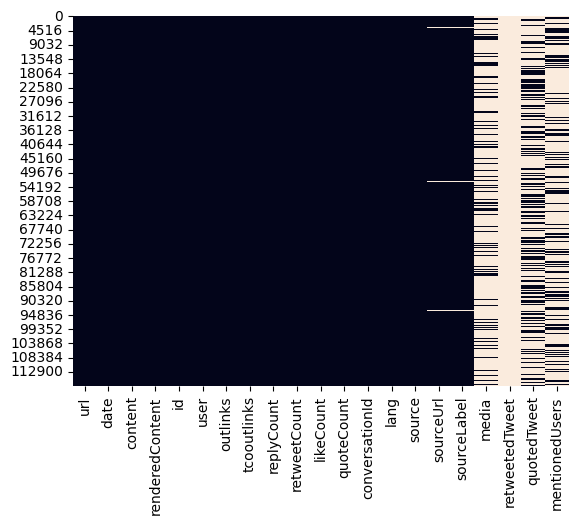

In [26]:
sns.heatmap(dataframe.isnull(), cbar=False)

In [27]:
dataframe["sourceUrl"]

0          http://twitter.com/download/iphone
1         http://twitter.com/download/android
2         http://twitter.com/download/android
3                  https://mobile.twitter.com
4          http://twitter.com/download/iphone
                         ...                 
117402     http://twitter.com/download/iphone
117403             https://mobile.twitter.com
117404             https://mobile.twitter.com
117405             https://mobile.twitter.com
117406     http://twitter.com/download/iphone
Name: sourceUrl, Length: 117407, dtype: object

In [28]:
dataframe["sourceLabel"]

0          Twitter for iPhone
1         Twitter for Android
2         Twitter for Android
3             Twitter Web App
4          Twitter for iPhone
                 ...         
117402     Twitter for iPhone
117403        Twitter Web App
117404        Twitter Web App
117405        Twitter Web App
117406     Twitter for iPhone
Name: sourceLabel, Length: 117407, dtype: object

In [29]:
dataframe["media"]

0                                                      None
1         [{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...
2                                                      None
3         [{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...
4         [{'previewUrl': 'https://pbs.twimg.com/media/E...
                                ...                        
117402                                                 None
117403    [{'previewUrl': 'https://pbs.twimg.com/media/E...
117404    [{'previewUrl': 'https://pbs.twimg.com/media/E...
117405                                                 None
117406                                                 None
Name: media, Length: 117407, dtype: object

In [30]:
dataframe["retweetedTweet"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
117402   NaN
117403   NaN
117404   NaN
117405   NaN
117406   NaN
Name: retweetedTweet, Length: 117407, dtype: float64

In [31]:
dataframe["quotedTweet"]

0         {'url': 'https://twitter.com/RaviSinghKA/statu...
1                                                      None
2                                                      None
3                                                      None
4                                                      None
                                ...                        
117402                                                 None
117403                                                 None
117404                                                 None
117405                                                 None
117406                                                 None
Name: quotedTweet, Length: 117407, dtype: object

In [32]:
dataframe["mentionedUsers"]

0         [{'username': 'narendramodi', 'displayname': '...
1         [{'username': 'Kisanektamorcha', 'displayname'...
2                                                      None
3         [{'username': 'ReallySwara', 'displayname': 'S...
4                                                      None
                                ...                        
117402                                                 None
117403                                                 None
117404                                                 None
117405                                                 None
117406    [{'username': 'Kisanektamorcha', 'displayname'...
Name: mentionedUsers, Length: 117407, dtype: object

## Manipulación y Limpieza de Datos

In [33]:
dataframe.fillna(0, inplace=True)

## Análisis Exploratorio de Datos

### Distribución de datos

Se visualiza la distribución de datos en columnas númericas. Existen 6 columnas numéricas en el dataframe, en donde se descarto analizar la columna "retweetedTweet", ya que contiene valores NaN en su completitud, asi como tambíen se descarto a la columna "conversationId", ya que contiene pocos valores únicos.

<Axes: >

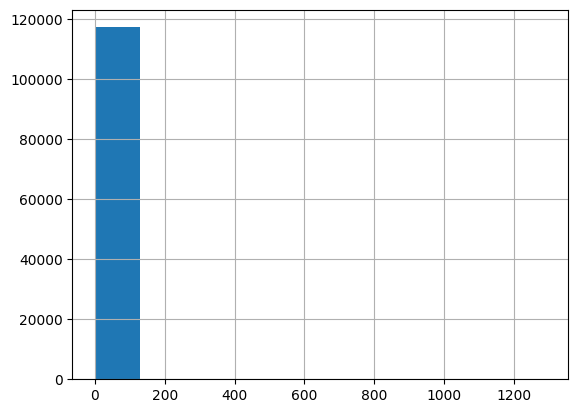

In [34]:
dataframe["replyCount"].hist()

<Axes: >

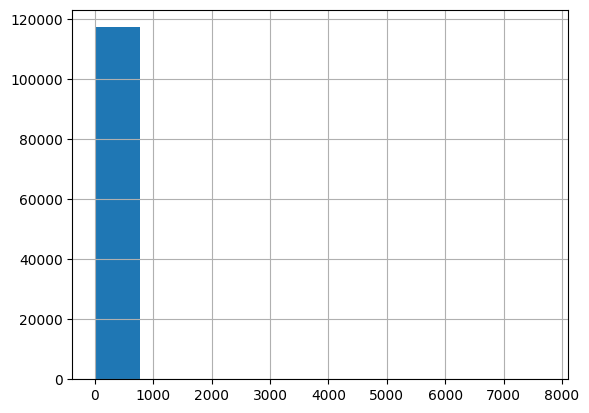

In [35]:
dataframe["retweetCount"].hist()

<Axes: >

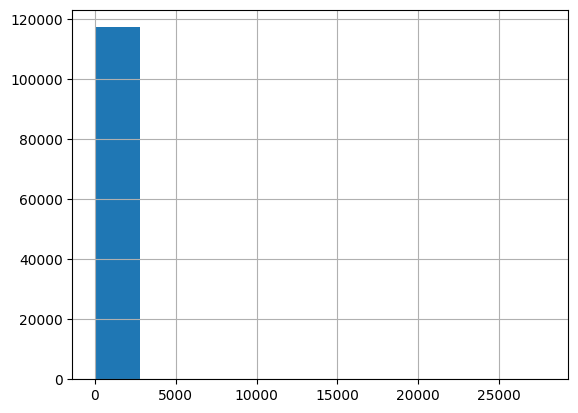

In [36]:
dataframe["likeCount"].hist()

<Axes: >

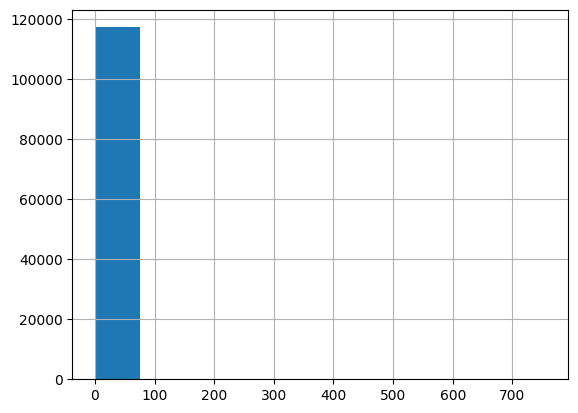

In [37]:
dataframe["quoteCount"].hist()

<Axes: xlabel='lang'>

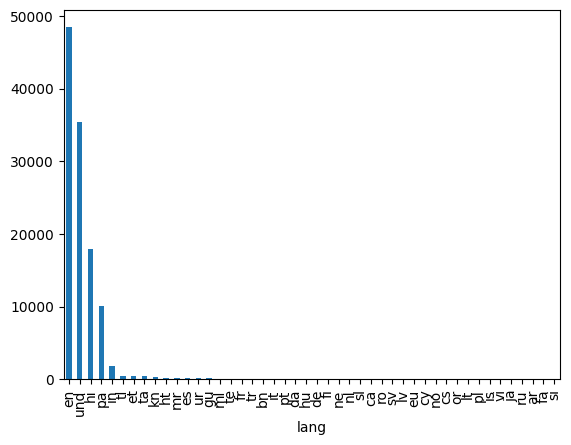

In [38]:
dataframe["lang"].value_counts().plot(kind='bar')

# Implementaciones

## Q1 Memoria v/s Tiempo

In [43]:
q1_memory(file_path)

[(datetime.date(2021, 2, 12), 'RanbirS00614606'),
 (datetime.date(2021, 2, 13), 'MaanDee08215437'),
 (datetime.date(2021, 2, 17), 'RaaJVinderkaur'),
 (datetime.date(2021, 2, 16), 'jot__b'),
 (datetime.date(2021, 2, 14), 'rebelpacifist'),
 (datetime.date(2021, 2, 18), 'neetuanjle_nitu'),
 (datetime.date(2021, 2, 15), 'jot__b'),
 (datetime.date(2021, 2, 20), 'MangalJ23056160'),
 (datetime.date(2021, 2, 23), 'Surrypuria'),
 (datetime.date(2021, 2, 19), 'Preetm91')]

In [44]:
q1_time(file_path)

[(datetime.date(2021, 2, 12), 'RanbirS00614606'),
 (datetime.date(2021, 2, 13), 'MaanDee08215437'),
 (datetime.date(2021, 2, 17), 'RaaJVinderkaur'),
 (datetime.date(2021, 2, 16), 'jot__b'),
 (datetime.date(2021, 2, 14), 'rebelpacifist'),
 (datetime.date(2021, 2, 18), 'neetuanjle_nitu'),
 (datetime.date(2021, 2, 15), 'jot__b'),
 (datetime.date(2021, 2, 20), 'MangalJ23056160'),
 (datetime.date(2021, 2, 23), 'Surrypuria'),
 (datetime.date(2021, 2, 19), 'Preetm91')]

In [59]:
# Medir el uso de memoria
mem_usage_memory_optimized = memory_usage((q1_memory, (file_path,)))
print(f"Uso de memoria (memoria optimizada): {max(mem_usage_memory_optimized) - min(mem_usage_memory_optimized)} MiB")

mem_usage_time_optimized = memory_usage((q1_time, (file_path,)))
print(f"Uso de memoria (tiempo optimizado): {max(mem_usage_time_optimized) - min(mem_usage_time_optimized)} MiB")

Uso de memoria (memoria optimizada): 52.80859375 MiB
Uso de memoria (tiempo optimizado): 2138.26171875 MiB


In [55]:
# Medir el tiempo de ejecución
start_time = time.time()
q1_memory(file_path)
end_time = time.time()
print(f"Tiempo de ejecución (memoria optimizada): {end_time - start_time} segundos")

start_time = time.time()
q1_time(file_path)
end_time = time.time()
print(f"Tiempo de ejecución (tiempo optimizado): {end_time - start_time} segundos")

Tiempo de ejecución (memoria optimizada): 8.710073471069336 segundos
Tiempo de ejecución (tiempo optimizado): 6.499408006668091 segundos


# Apuntes

- Son 117407 filas.
- Son 21 columnas.
- No existen filas duplicadas.
- Se rellenó con 0 los valores NaN del dataframe.
- No se cambiaron los nombre de las columnas, ya que detallan bien lo que representan.
- La columna retweetedTweet contiene exclusivamente NaN en todas sus filas.
- El lenguaje más utilizado es el inglés.
- Las filas númericas relacionadas con el conteo de replys, retweets, quotes y likes, concentran sus datos en un rango especifico, lo cual tiene sentido ya que representan conteos, por lo que es raro ver un histograma que no se concentre en el rango entre 0 y x.